In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [2]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format

df_analyse=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')  
df_analyse.sort_values('date',ascending=True).head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [3]:
N0=1000000 # max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate


# condition I0+S0+R0=N0
I0=df_analyse.Germany[35]
S0=N0-I0
R0=0

In [4]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

In [5]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

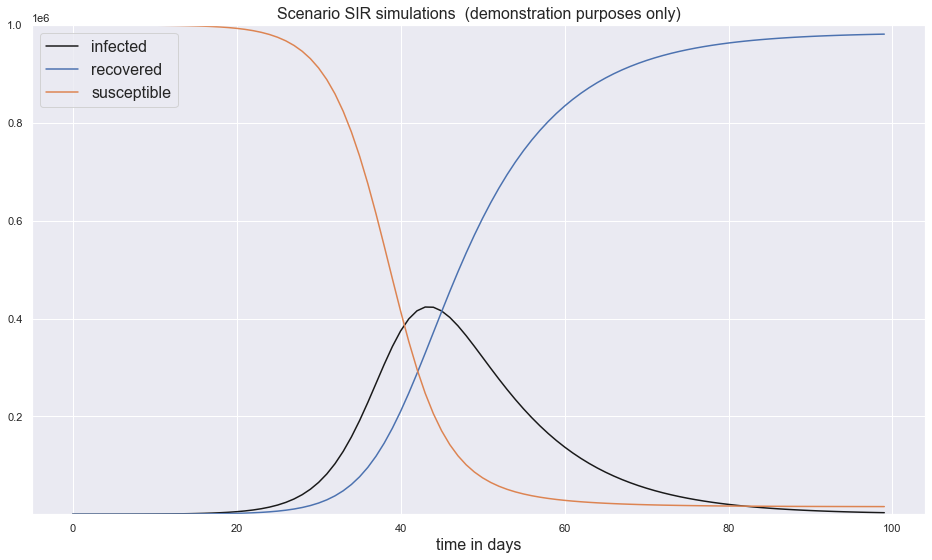

In [6]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Scenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# Fitting the parameters of SIR model

In [7]:
from scipy import optimize
from scipy import integrate


In [8]:
ydata = np.array(df_analyse.Germany[35:150])
t=np.arange(len(ydata))

In [9]:
# ensure re-initialization 
I0=ydata[0]
S0=N0-I0
R0=0
beta

0.4

In [10]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' 
        Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [11]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [12]:
# example curve of our differential equation
popt=[0.4,0.1]
fit_odeint(t, *popt)

array([2.10000000e+01, 2.83467442e+01, 3.82635349e+01, 5.16492851e+01,
       6.97171980e+01, 9.41045567e+01, 1.27020786e+02, 1.71447062e+02,
       2.31405299e+02, 3.12320402e+02, 4.21507742e+02, 5.68828389e+02,
       7.67568562e+02, 1.03561758e+03, 1.39704132e+03, 1.88417601e+03,
       2.54040014e+03, 3.42377774e+03, 4.61179988e+03, 6.20746901e+03,
       8.34695108e+03, 1.12089170e+04, 1.50254352e+04, 2.00937383e+04,
       2.67872046e+04, 3.55622587e+04, 4.69554712e+04, 6.15620761e+04,
       7.99843269e+04, 1.02737867e+05, 1.30110563e+05, 1.61985487e+05,
       1.97668411e+05, 2.35790176e+05, 2.74361695e+05, 3.11019967e+05,
       3.43420416e+05, 3.69650711e+05, 3.88523547e+05, 3.99666850e+05,
       4.03424001e+05, 4.00642226e+05, 3.92438005e+05, 3.80000472e+05,
       3.64456984e+05, 3.46798540e+05, 3.27850544e+05, 3.08272539e+05,
       2.88573617e+05, 2.69134372e+05, 2.50230013e+05, 2.32051744e+05,
       2.14725295e+05, 1.98326261e+05, 1.82892479e+05, 1.68433817e+05,
      

In [13]:
# the resulting curve has to be fitted
# free parameters are here beta and gamma

In [14]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

C:\Users\hp\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation errors :  [0.00416738 0.00392658]  start infect: 21
Optimal parameters: beta = 0.21890175996530326  and gamma =  0.08485645862684751


<ipython-input-10-208e4ee0db5d>:17: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0
<ipython-input-10-208e4ee0db5d>:18: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
<ipython-input-10-208e4ee0db5d>:19: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I
C:\Users\hp\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [15]:
# get the final fitted curve
fitted=fit_odeint(t, *popt)

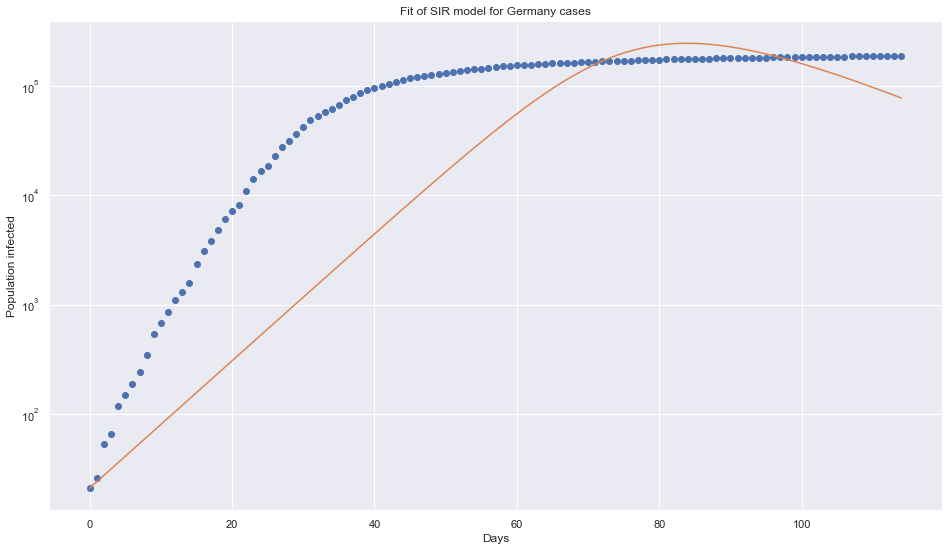

Optimal parameters: beta = 0.21890175996530326  and gamma =  0.08485645862684751
Basic Reproduction Number R0  2.5796711706755753


In [16]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])

# Dynamic beta in SIR (infection rate)

In [17]:
t_initial=28
t_intro_measures=14
t_hold=21
t_relax=21

beta_max=0.4
beta_min=0.11
gamma=0.1
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                        np.linspace(beta_min,beta_max,t_relax),
                       ))

In [18]:
pd_beta

array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.37769231,
       0.35538462, 0.33307692, 0.31076923, 0.28846154, 0.26615385,
       0.24384615, 0.22153846, 0.19923077, 0.17692308, 0.15461538,
       0.13230769, 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.1245    ,
       0.139     , 0.1535    , 0.168     , 0.1825    , 0.197     ,
       0.2115    , 0.226     , 0.2405    , 0.255     , 0.2695 

In [19]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_beta in pd_beta:
   
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

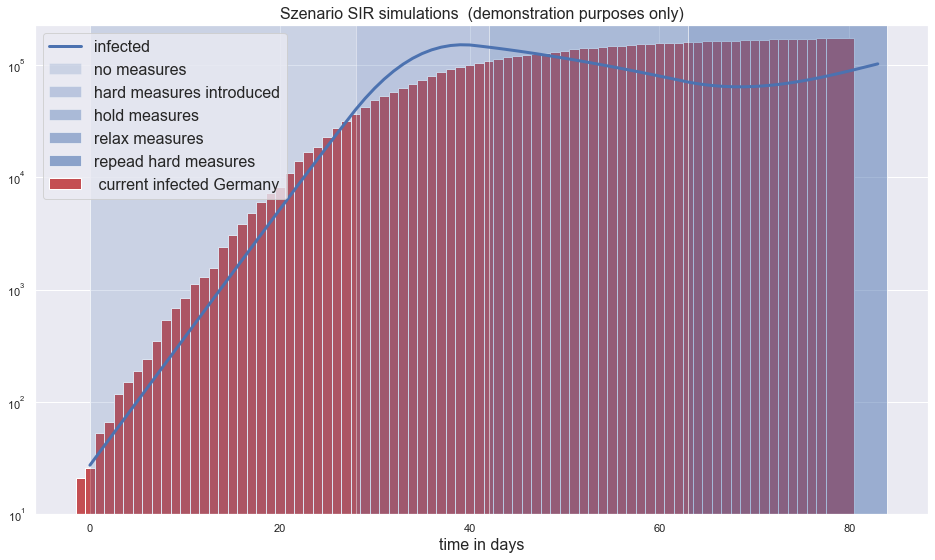

In [20]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)

t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()

ax1.bar(np.arange(len(ydata[0:80])),ydata[0:80], width=3,label=' current infected Germany',color='r')
ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')

ax1.set_ylim(10, 1.5*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

In [21]:
df_analyse

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3
...,...,...,...,...,...,...
848,2022-05-19,17178199,83060959,12179234,25998085,17914957
849,2022-05-20,17205017,83237592,12179234,26040460,17938399
850,2022-05-21,17229263,83263020,12234806,26044283,17957697
851,2022-05-22,17247552,83281329,12234806,26045528,17967672


In [22]:
country_list = ['Italy',
               'US',
               'Spain',
               'Germany',
               'Korea, South',]

In [23]:
import os
if os.path.split(os.getcwd())[-1]=='notebooks':
    os.chdir("../")
    
'Your base path is at: '+os.path.split(os.getcwd())[-1]

'Your base path is at: ads_covid-19'

# Combining 5 Countries

C:\Users\hp\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-10-208e4ee0db5d>:17: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0
<ipython-input-10-208e4ee0db5d>:18: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\hp\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation errors :  [0.00381855 0.00345254]  start infect: 453
Optimal parameters: beta = 0.20874222474265638  and gamma =  0.06621013476587409


C:\Users\hp\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-10-208e4ee0db5d>:17: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0
<ipython-input-10-208e4ee0db5d>:18: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
<ipython-input-10-208e4ee0db5d>:19: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I
C:\Users\hp\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation errors :  [0.00194364 0.0001716 ]  start infect: 16
Optimal parameters: beta = 0.21750970757351817  and gamma =  -0.011714486560355033


C:\Users\hp\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-10-208e4ee0db5d>:17: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0
<ipython-input-10-208e4ee0db5d>:18: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
<ipython-input-10-208e4ee0db5d>:19: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I
C:\Users\hp\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitati

standard deviation errors :  [0.00376749 0.00338274]  start infect: 13
Optimal parameters: beta = 0.20894048155471778  and gamma =  0.06424106294779483


<ipython-input-10-208e4ee0db5d>:17: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0
<ipython-input-10-208e4ee0db5d>:18: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
<ipython-input-10-208e4ee0db5d>:19: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I
C:\Users\hp\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation errors :  [0.00416738 0.00392658]  start infect: 21
Optimal parameters: beta = 0.21890175996530326  and gamma =  0.08485645862684751
standard deviation errors :  [0.01948895 0.01907722]  start infect: 1261
Optimal parameters: beta = 0.5533131185929911  and gamma =  0.4600197642189082


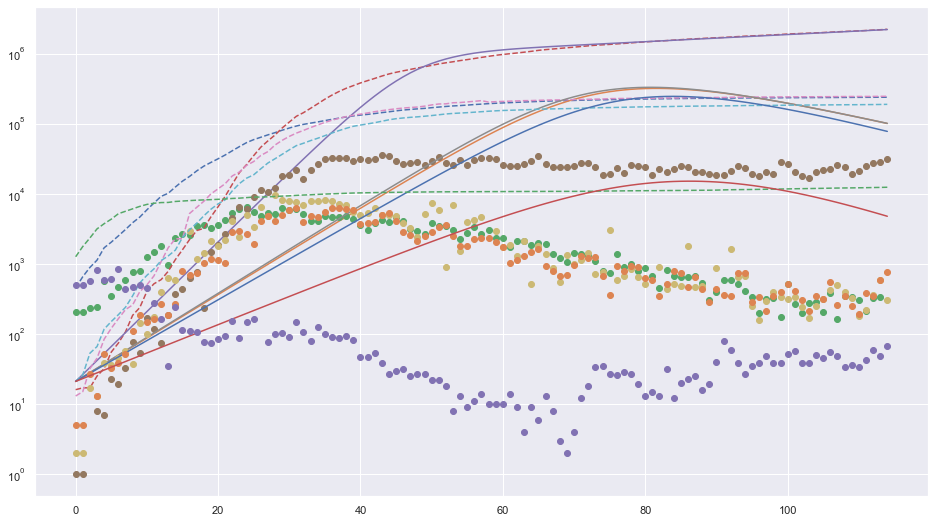

In [24]:
i=1
final_data = []
diff = []
temp = []
for each in country_list:
    country = df_analyse.columns[i]
    ydata_total = np.array(df_analyse[country])[35:150]
    t=np.arange(len(ydata_total))
    
    popt, pcov = optimize.curve_fit(fit_odeint, t, ydata_total)
    perr = np.sqrt(np.diag(pcov))
    
    print('standard deviation errors : ',str(perr), ' start infect:',ydata_total[0])
    print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
    
   

    fitted=fit_odeint(t, *popt)
    
    # option 1: ydata is cummulative, thus we need cumulative fitted line
    plt.semilogy(t, ydata_total, '--')
    
    plt.semilogy(t, fitted)

    # option2: ydata is cummulative, however we would like to have the day to day difference
    plt.semilogy(t,np.ediff1d(ydata_total, to_begin=ydata_total[1]-ydata_total[0]), 'o')
    
    # Storing the fitted data
    final_data.append(fitted)
    
    # Storing the difference in cases data
    diff.append(np.ediff1d(ydata_total, to_begin=ydata_total[1]-ydata_total[0]))
                   
    # Assigning fitted date into Dataframe                 
    final_data_df = pd.DataFrame(final_data)
    final_data_df = final_data_df.T
    
    # Assigning difference in cases data to Dataframe
    diff_data_df = pd.DataFrame(diff)
    diff_data_df = diff_data_df.T
    
    i=i+1
    
final_data_df.columns = country_list
diff_data_df.columns = country_list
    

In [25]:
final_data_df
df_analyse_plot = df_analyse[35:150]
df_analyse_plot = df_analyse_plot.reset_index(drop=True)

In [26]:
diff_data_df

,Italy,US,Spain,Germany,"Korea, South"
0,202,1,2,5,505
1,202,1,2,5,505
2,233,0,17,27,571
3,240,8,13,13,813
4,566,7,39,51,586
5,342,23,36,33,599
6,466,19,45,38,851
7,587,33,57,52,435
8,769,77,37,109,467
9,778,53,141,185,505


# Dash

In [ ]:
import pandas as pd
import numpy as np

import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output,State

import plotly.graph_objects as go

fig = go.Figure()

app = dash.Dash()
app.layout = html.Div([

    dcc.Markdown('''
    #  Applied Data Science on COVID-19 data - SIR Modelling

        Simple SIR model
        This graph shows the fitted curve and actual COVID-19 cases.
        Also the day to day difference in cases has also been plotted.
    '''),

    dcc.Markdown('''
    ## Multi-Select Country for visualization
    '''),


    dcc.Dropdown(
        id='country_drop_down',
        options=[ {'label': each,'value':each} for each in country_list],
        value=['Italy'], # which are pre-selected
        multi=True
    ),

    dcc.Graph(figure=fig, id='main_window_slope')
])


@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])

def update_figure(country_list):
    
    traces = []
    
    for each in country_list:
        
        df_plot1=df_analyse_plot[each]
        df_plot2=final_data_df[each]
        df_plot3=diff_data_df[each]
        
        
        traces.append(dict(x=df_plot1.index,
                                y=df_plot1,
                                mode='lines',
                                opacity=0.9,
                                name=each,
                                font=dict(family='Arial',
                                size=3,
                                color='rgb(37,37,37)'),
                        )
                )
        
        traces.append(dict(x=df_plot2.index,
                                y=df_plot2,
                                mode='markers+lines',
                                opacity=0.9,
                                name=each + ' fitted curve'
                        )
                )

        traces.append(dict(x=df_plot3.index,
                                y=df_plot3,
                                mode='markers',
                                opacity=0.9,
                                name=each + ' difference day to day cases' 
                        )
                )
        
    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,

                xaxis={'title':'Timeline',
                        'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                      },

                yaxis={'title':'COVID Cases',
                        'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        'type':"log"
                      }
        )
    }

if __name__ == '__main__':

    app.run_server(debug=True, use_reloader=False,port=8000)

Dash is running on http://127.0.0.1:8000/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


<ipython-input-27-a6abf4d0f801>:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-27-a6abf4d0f801>:7: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
